In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver

## Use `geoJSON` to create road network and randomly generate customer on residential area

In this notebook, we are going to use local `geoJSON` file to 
- Create road network
- Display road network
- Randomly sample customers locations on road network/residential area

### 0. Preparation

To use `geoJSON` functions, we need to download the `geoJSON` files. Typically, we can get`geoJSON` file from OpenStreetMap website.

Ref: https://wiki.openstreetmap.org/wiki/Downloading_data

In this demo, we are using a `geoJSON` file of Xiamen, Fujian, China. (Aug. 30th, 2023)

In [18]:
cityName = 'Xiamen'

In [19]:
geoJSONPath = "../data/%s.geojson" % cityName

### 1. Read highways fron `geoJSON` file
catergorize by motorway, country level roads, residential streets

In [20]:
network = vrpSolver.createRoadNetworkFromGeoJSON(
    geoJSONPath = geoJSONPath)

### 2. Randomly (uniformly) genearte customers on residential roads inside a polygon

#### 2.1 Define a polygon

In [21]:
poly = [[24.550558357983217, 118.08431625366208],
         [24.564454255248982, 118.11161041259763],
         [24.56663998654322, 118.1486892700195],
         [24.548060055856265, 118.18353652954099],
         [24.516670897942557, 118.21306228637692],
         [24.469025602689495, 118.20413589477536],
         [24.412765325831455, 118.13169479370114],
         [24.433084432919536, 118.07521820068357],
         [24.44652450497289, 118.07367324829099],
         [24.459806888962795, 118.0637168884277],
         [24.47652507526857, 118.06251525878906],
         [24.5271348225978, 118.07744979858396]]

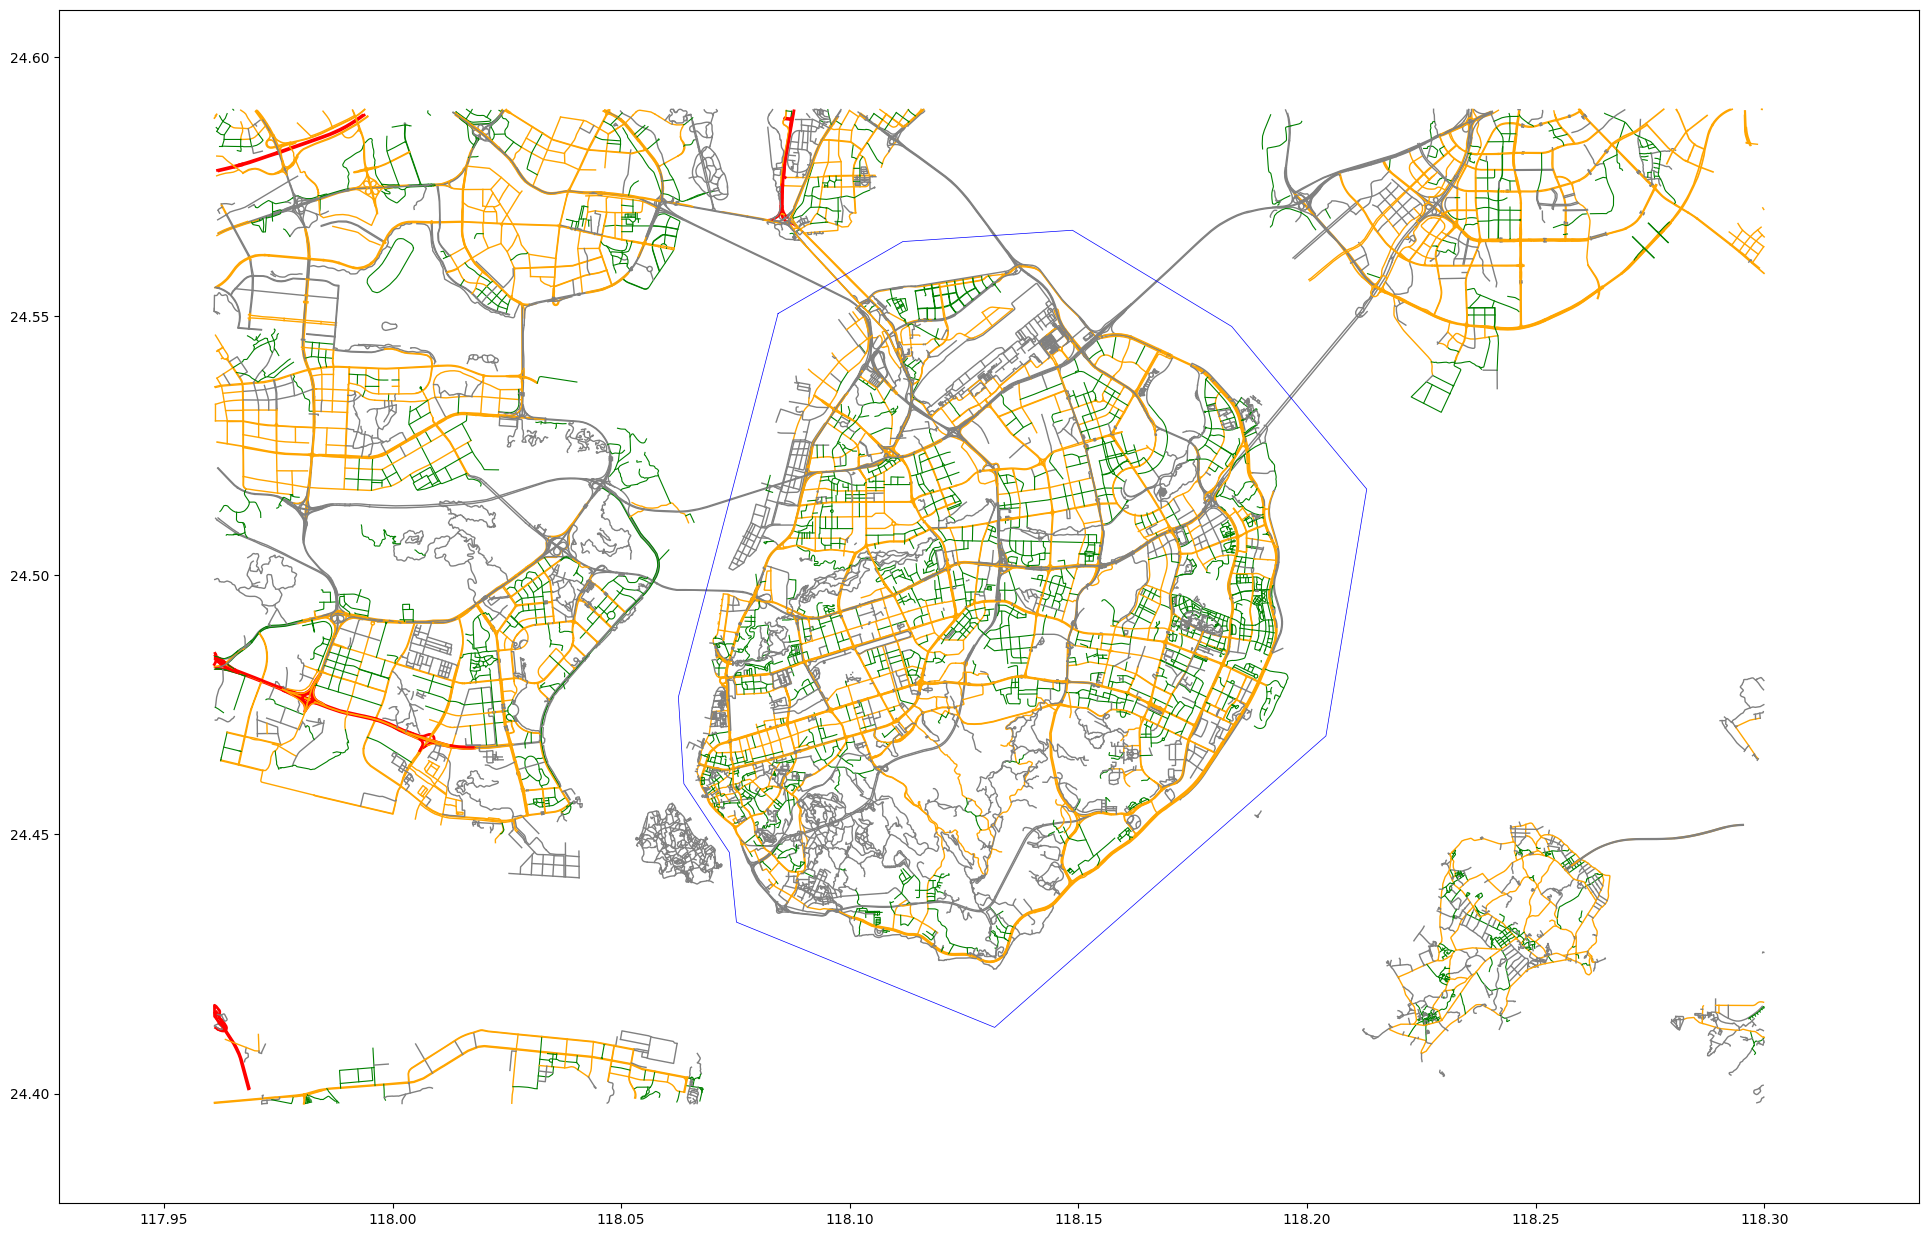

In [22]:
fig, ax = vrpSolver.plotRoads(
    roads = network['road'],
    roadShowFlags = True,
    figSize = [24, 15.5])
# Plot the polygon where customers are created
fig, ax = vrpSolver.plotPoly(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

#### 2.2 Generate customers

In [24]:
customers = vrpSolver.rndNodes(
    N = 50,
    distr = "RoadNetworkPolyLatLon",
    roads = network['road'],
    polyLatLon = poly,
    roadClass = ['residential']
)

C:\Users\isaac\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


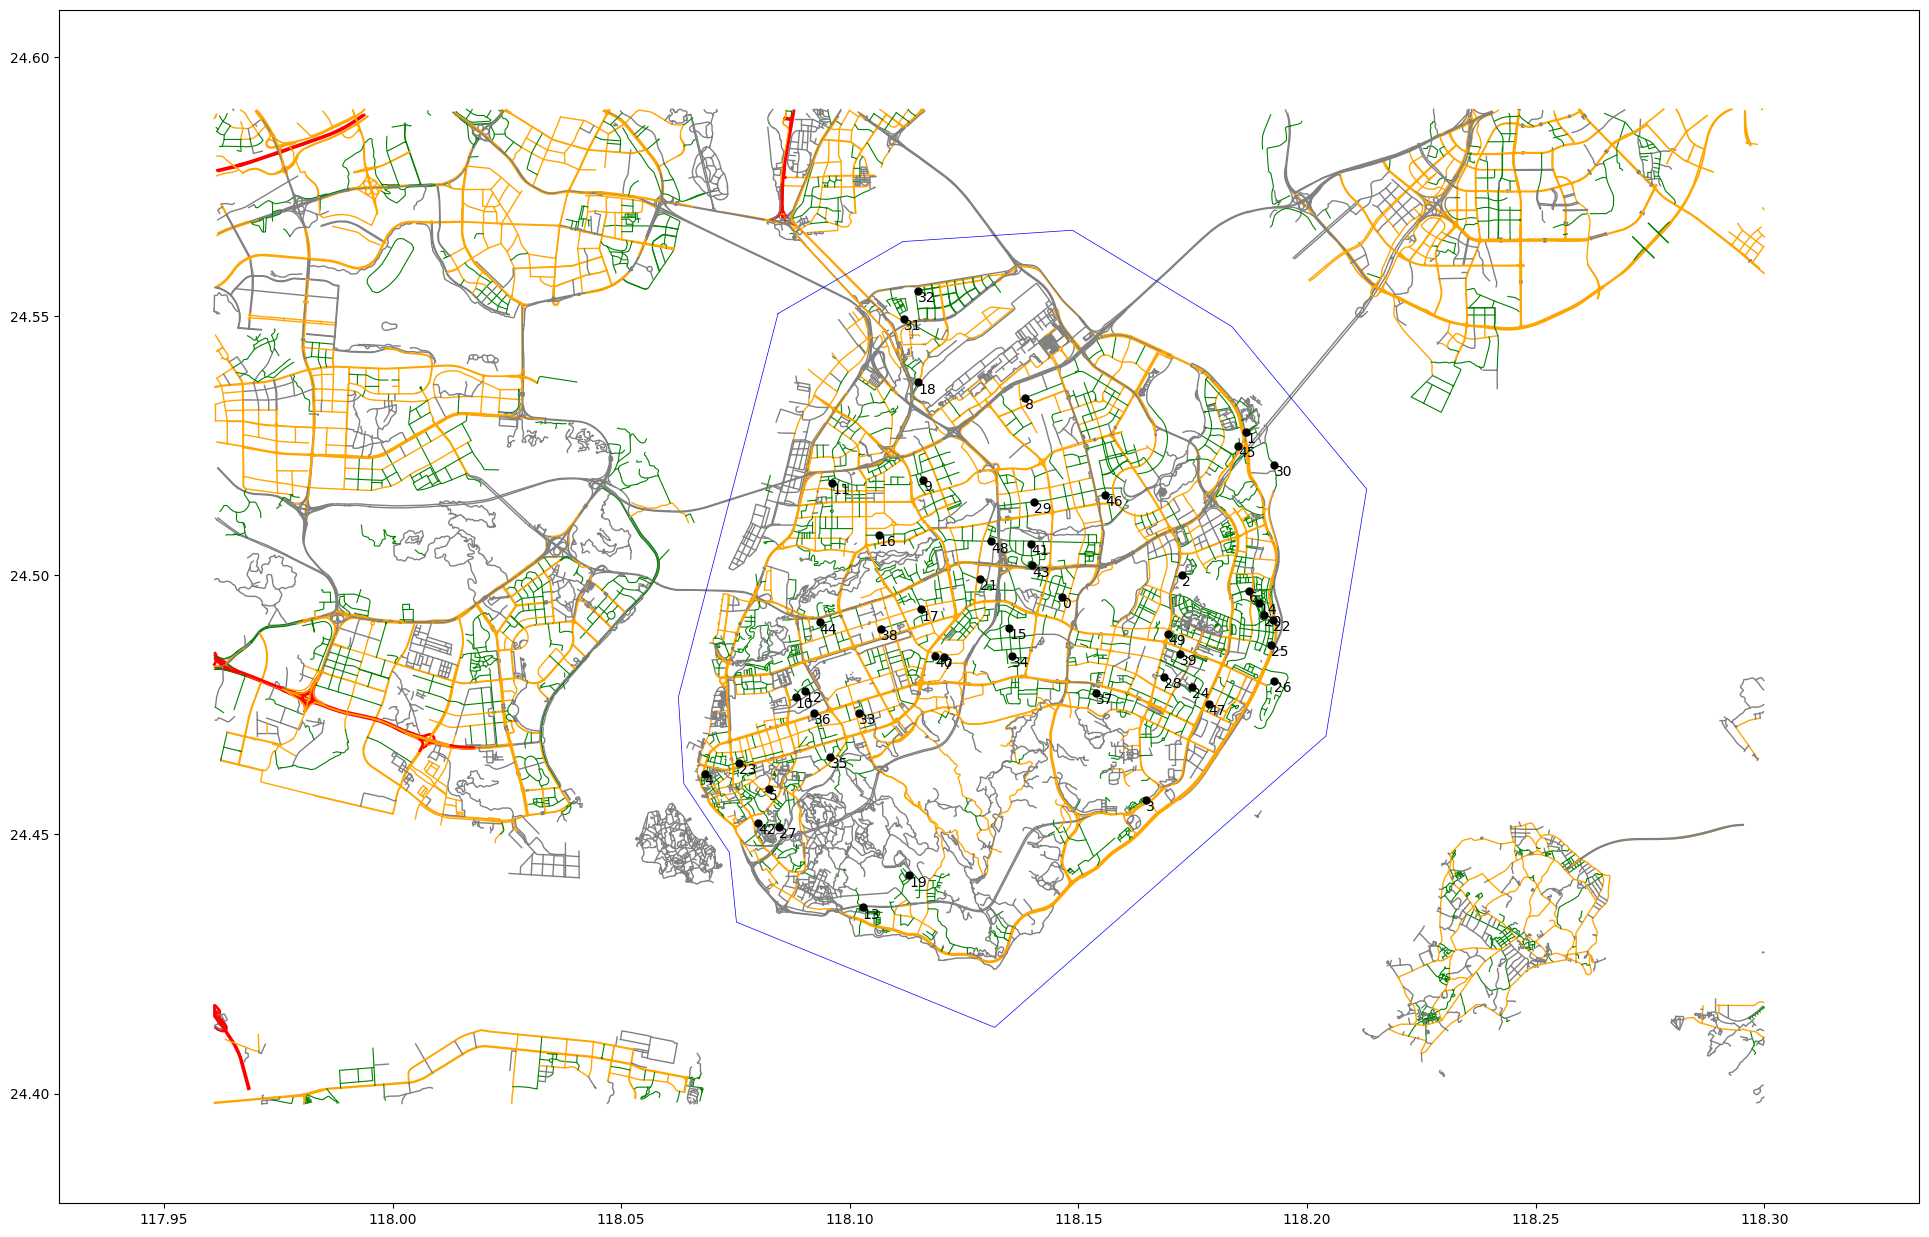

In [25]:
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    nodeColor = 'black',
    nodeMarkerSize = 5,
    xyReverseFlag = True)
fig

### 3. Randomly (uniformly) genearte customers on residential roads inside a circle

#### 3.1 Define a circle

In [26]:
centerLoc = [24.485, 118.13]
radiusInMeters = 7500

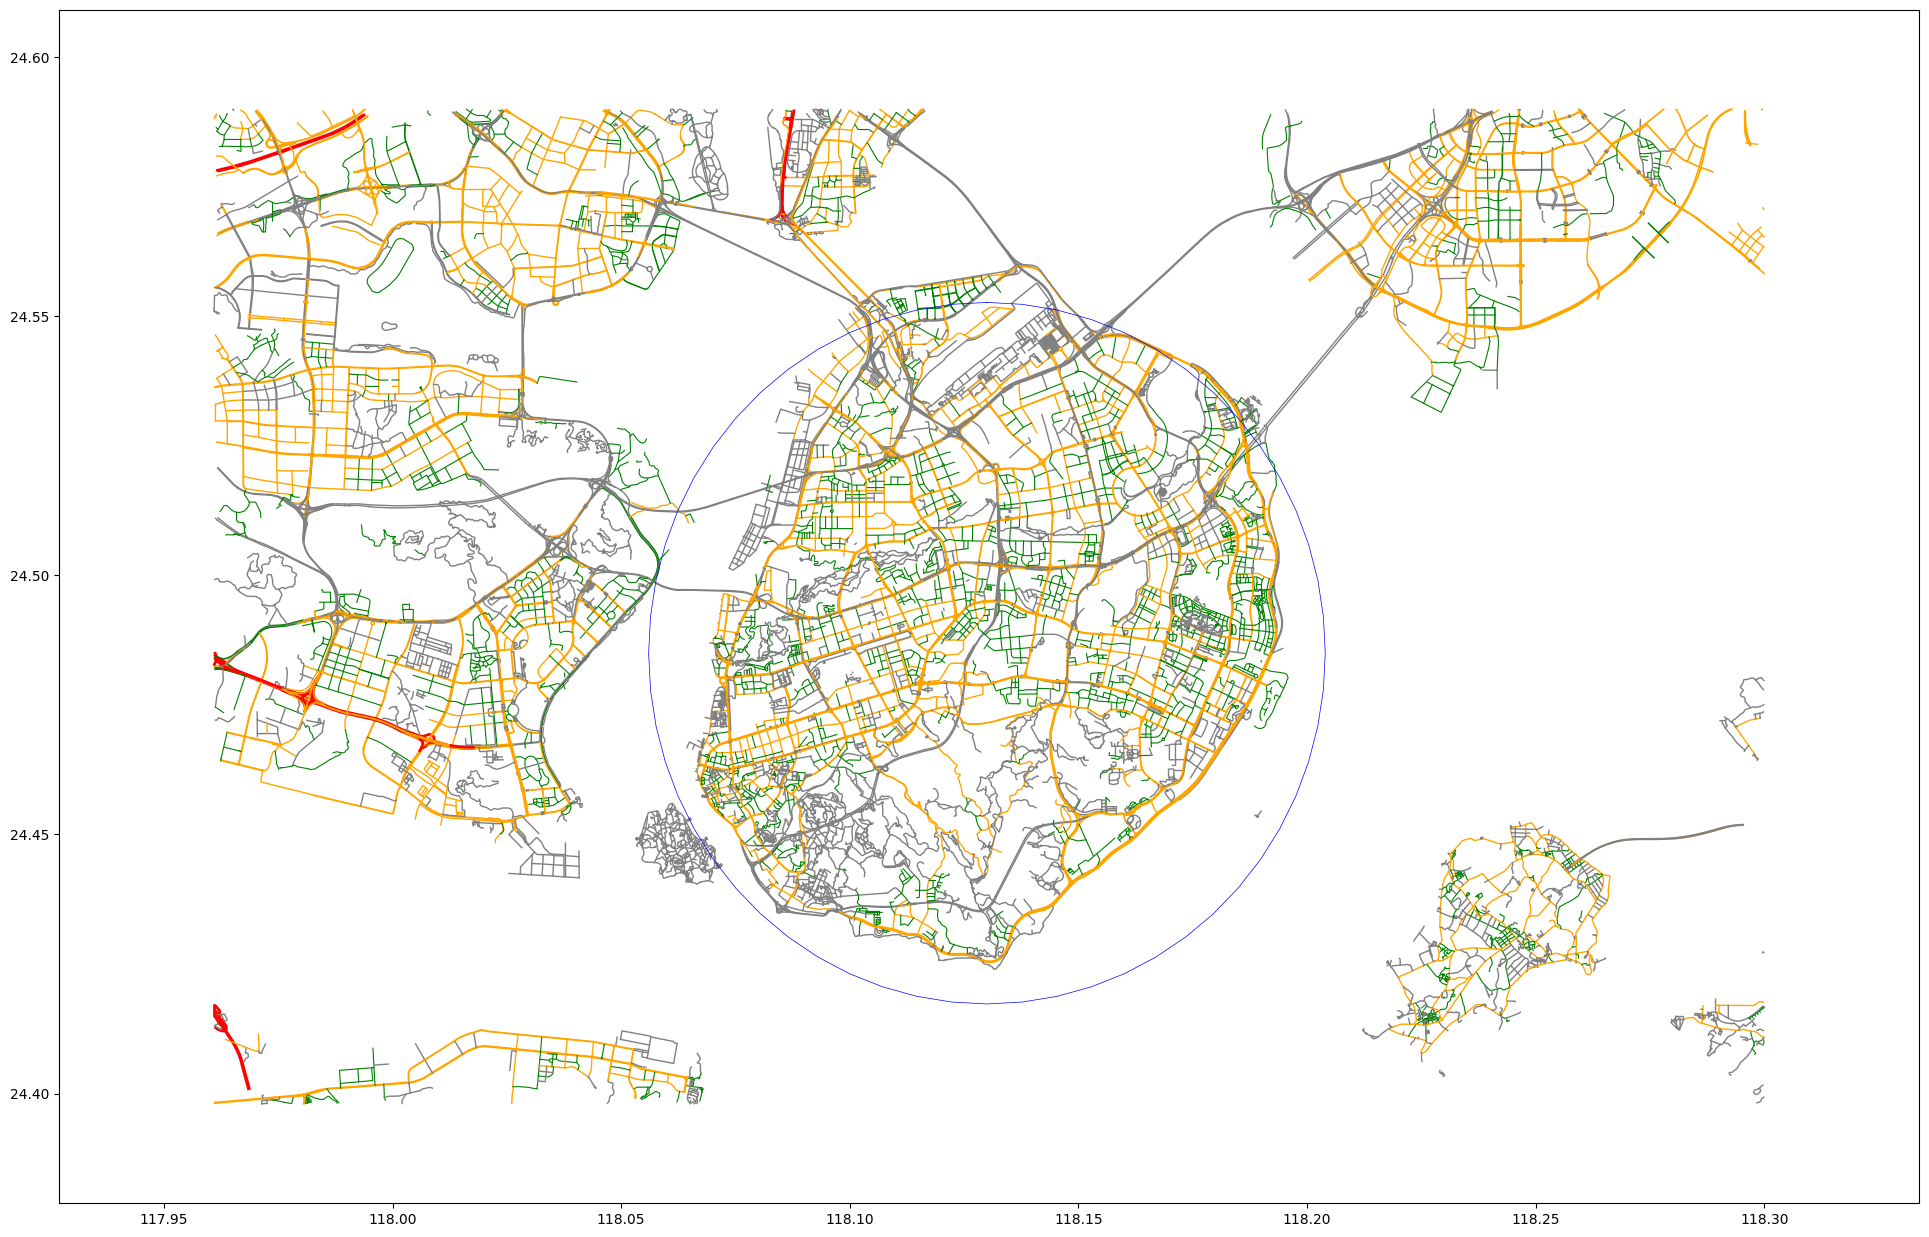

In [27]:
fig, ax = vrpSolver.plotRoads(
    roads = network['road'],
    roadShowFlags = True,
    figSize = [24, 15.5])
poly = vrpSolver.circleByCenterLatLon(centerLoc, radiusInMeters, lod = 60)
fig, ax = vrpSolver.plotPoly(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

#### 3.2 Generate customers

In [11]:
customers = vrpSolver.rndNodes(
    N = 50,
    distr = "RoadNetworkCircleLatLon",
    roads = network['road'],
    centerLatLon = centerLoc,
    radiusInMeters = radiusInMeters,
    roadClass = ['residential']
    )

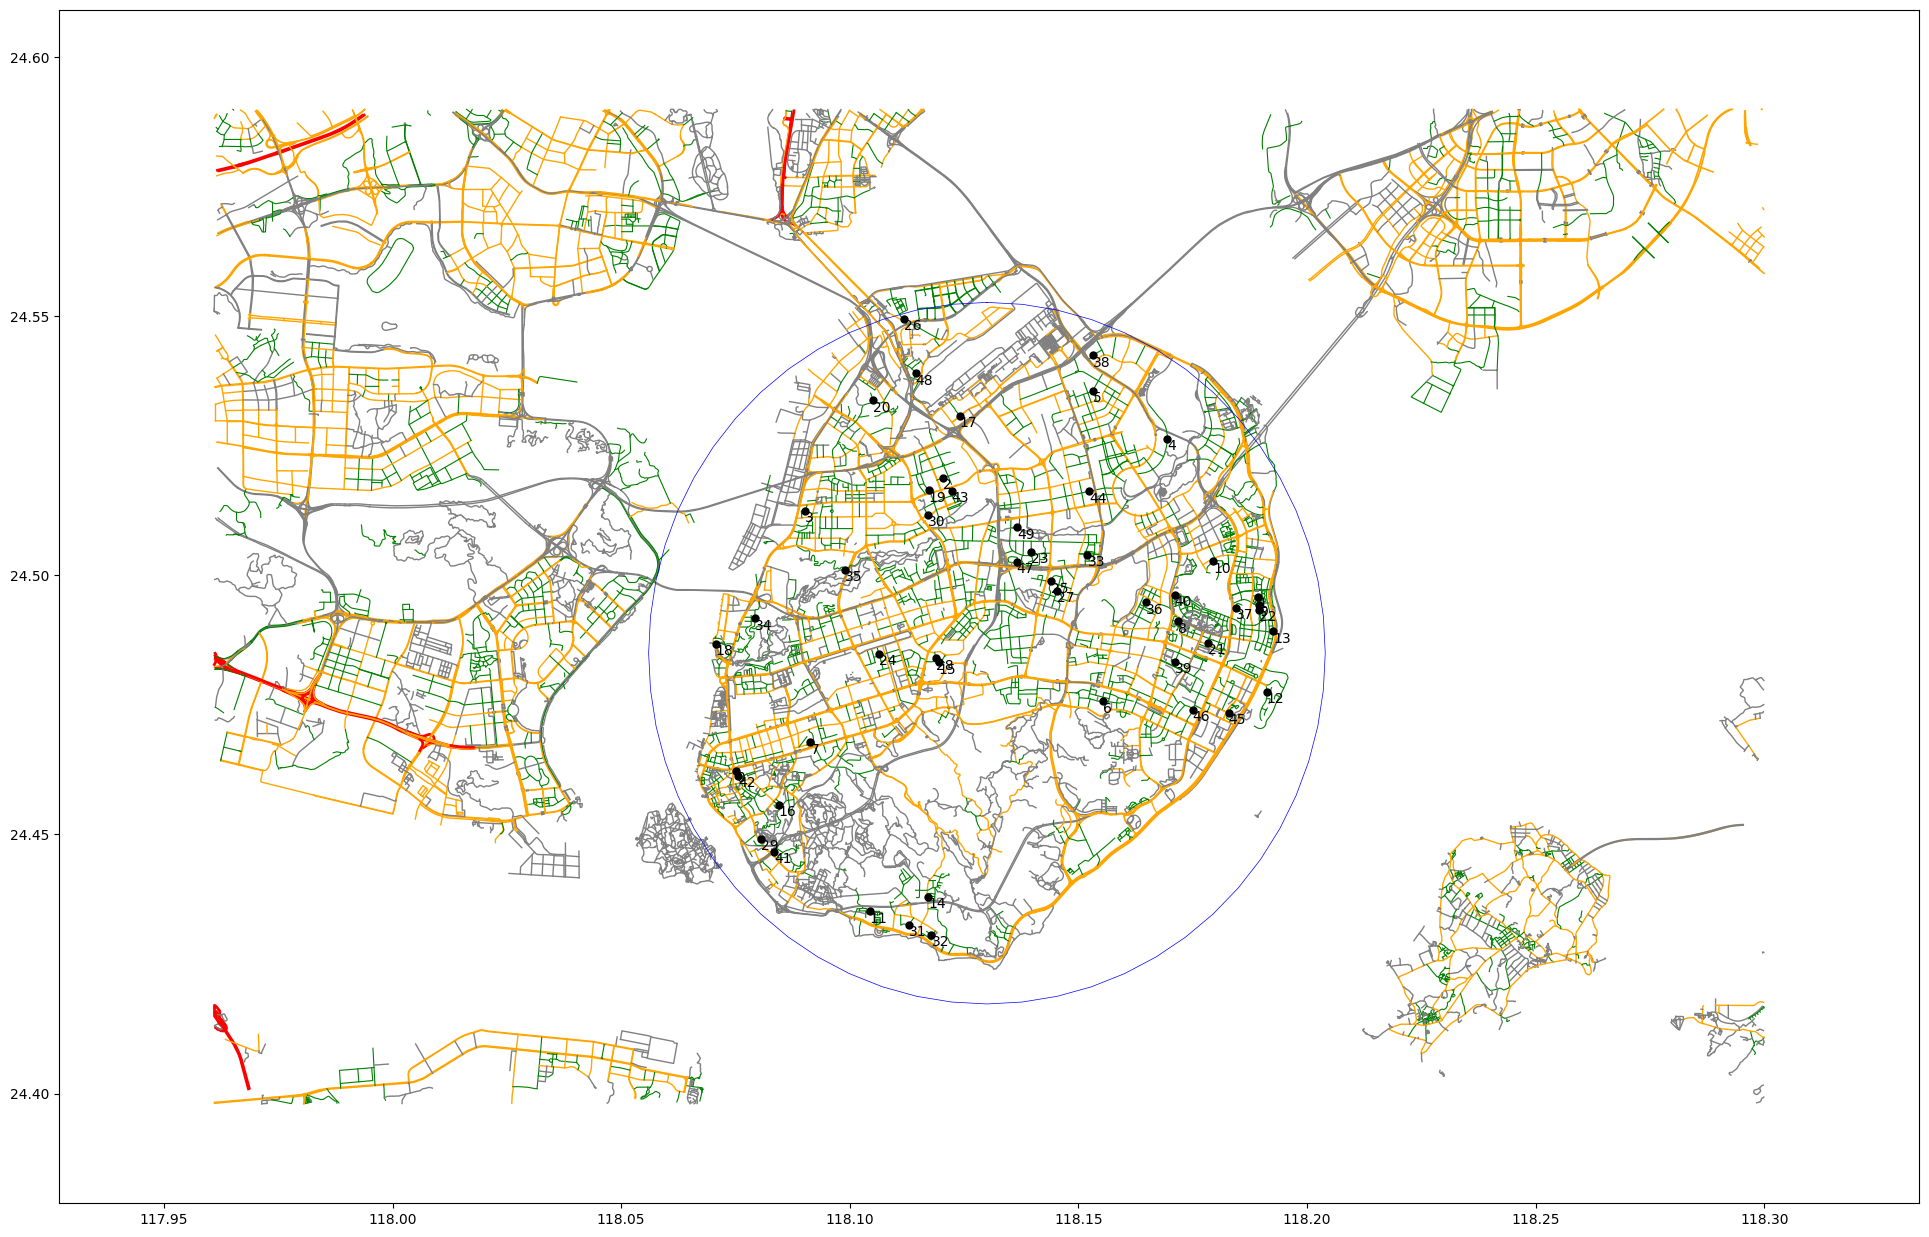

In [12]:
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    nodeColor = 'black',
    nodeMarkerSize = 5,
    xyReverseFlag = True)
fig